# Presentation 2

Author: Yoann Pradat

Here is the code that helped me produce the figures displayed in my second presentation.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
import numpy as np

plt.rcParams['text.usetex'] = True
cmap = cm.get_cmap('tab10')
colors = [cmap(i) for i in range(10)]

# For removing 0 from axis tick labels
func = lambda x, pos: "" if np.isclose(x,0) else x

In [2]:
def d_operator(f, x, r):
    if r==0:
        return f(x)
    else:
        eps = 1e-4
        return (d_operator(f, x+eps, r-1) - d_operator(f, x-eps, r-1))/(2*eps)

In [3]:
def bracket(ax, pos=[0,0], scalex=1, scaley=1, text="",textkw = {}, linekw = {}):
    x = np.array([0, 0.05, 0.45,0.5])
    y = np.array([0,-0.01,-0.01,-0.02])
    x = np.concatenate((x,x+0.5)) 
    y = np.concatenate((y,y[::-1]))
    ax.plot(x*scalex+pos[0], y*scaley+pos[1], clip_on=False, 
            transform=ax.get_xaxis_transform(), **linekw)
    ax.text(pos[0]+0.5*scalex, (y.min()-0.01)*scaley+pos[1], text, 
                transform=ax.get_xaxis_transform(),
                ha="center", va="top", **textkw)

## Examples of interpolation

In order to give an idea of the problems we try to address here are examples of possible interpolation fit through points in a plane. For that le't generate 2d points as follows

- y-coordinate = $\sin(2\pi t)$  (that of a circle)
- x-coordinate = $\mathcal{N(0, \sigma=0.2)} +  \cos(2\pi t)$ (random perturbation around circle).

The "ground truth" contour will be that from sinc interpolation (supposing periodic curve i.e closed curve).

In [4]:
np.random.seed(24)
M = 8
T_sample = np.linspace(0, 1-1/M, M)

X = np.cos(2*np.pi*T_sample) + 0.4*np.random.randn(M)
Y = np.sin(2*np.pi*T_sample)

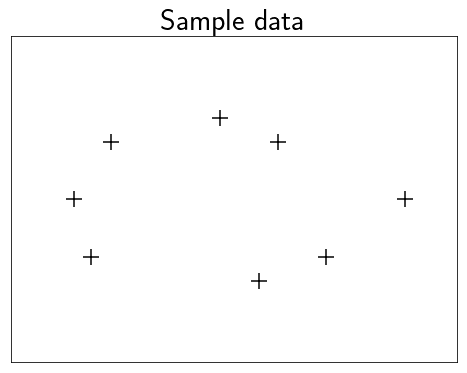

In [5]:
# Draw sample data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.scatter(X, Y, s=250, marker='+', color='black')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))
ax.set_title('Sample data', fontsize=30)
plt.show(fig)

Simulated contour by sin cardinal interpolation i.e $\forall t \in \mathbb{R}$

\begin{align*}
 x(t) &= \sum_{k=0}^{M-1} x[k] \text{sincd}_M(t-k) \\
 y(t) &= \sum_{k=0}^{M-1} y[k] \text{sincd}_M(t-k) 
\end{align*}

or using vector-valued coefficients 


\begin{equation*}
 r(t) = \sum_{k=0}^{M-1} r[k] \text{sincd}_M(t-k) 
\end{equation*}

In [6]:
def sincd(x, N):
    if np.abs(x%N) < 1e-10:
        return 1
    else:
        if N%2 == 0:
            return np.sin(np.pi*x)/(N*np.tan(np.pi*x/N))
        else:
            return np.sin(np.pi*x)/(N*np.sin(np.pi*x/N))
        
def sincd_itrp(X, T):
    N = len(X)
    if isinstance(T, np.ndarray):    
        return np.array([sum([X[k]*sincd(t-k, N) for k in range(N)]) for t in T])
    else:
        return sum([X[k]*sincd(T-k, N) for k in range(N)])

### Object

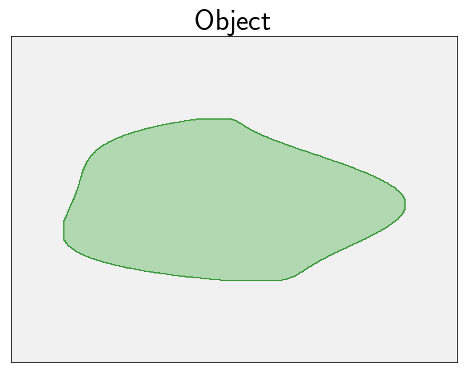

In [7]:
T_simulated = np.linspace(0, M, 10000)

# Interpolate with sincd
X_contour = sincd_itrp(X, T_simulated)
Y_contour = sincd_itrp(Y, T_simulated)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

# Fill in inside and outside in 2 colors
h = 0.01
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

vecint = np.vectorize(np.int)

# Round contour coord
X_contour_grid =  vecint((X_contour-x_min)/h)
Y_contour_grid = vecint((Y_contour-y_min)/h)

# Get rectangular limits of contour
X_contour_min = X_contour_grid.min()
X_contour_max = X_contour_grid.max()

Y_contour_min = Y_contour_grid.min()
Y_contour_max = Y_contour_grid.max()

# Number of cells in the grid
nx = np.int((x_max - x_min)/h)
ny = np.int((y_max - y_min)/h)

Z = []
for y in range(ny):
    if y <= Y_contour_min or Y_contour_max <= y:
        Z += [0]*nx
    else:
        for x in range(nx):
            if x <= X_contour_min or X_contour_max <= x:
                Z += [0]
            else:
                ylim = Y_contour_grid[np.where(X_contour_grid==x)]
                if y < min(ylim) or max(ylim) < y:
                    Z += [0]
                else:
                    Z += [1]
            
                    
Z = np.array(Z)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['lightgray', 'green']))

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

ax.set_title('Object', fontsize=30)

fig.savefig("../lab_meeting/presentation_2/object.png")
plt.show(fig)

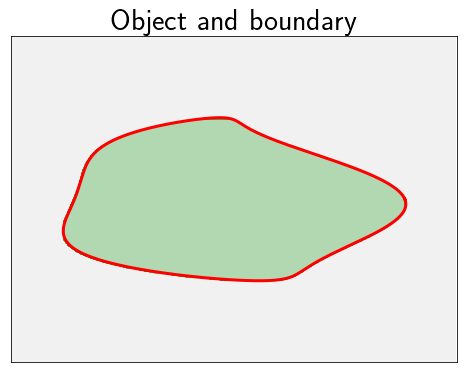

In [8]:
T_simulated = np.linspace(0, M, 10000)

# Interpolate with sincd
X_contour = sincd_itrp(X, T_simulated)
Y_contour = sincd_itrp(Y, T_simulated)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

# Draw simulated contour
ax.plot(X_contour, Y_contour, lw=3, color='red')

# Fill in inside and outside in 2 colors
h = 0.01
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

vecint = np.vectorize(np.int)

# Round contour coord
X_contour_grid =  vecint((X_contour-x_min)/h)
Y_contour_grid = vecint((Y_contour-y_min)/h)

# Get rectangular limits of contour
X_contour_min = X_contour_grid.min()
X_contour_max = X_contour_grid.max()

Y_contour_min = Y_contour_grid.min()
Y_contour_max = Y_contour_grid.max()

# Number of cells in the grid
nx = np.int((x_max - x_min)/h)
ny = np.int((y_max - y_min)/h)

Z = []
for y in range(ny):
    if y <= Y_contour_min or Y_contour_max <= y:
        Z += [0]*nx
    else:
        for x in range(nx):
            if x <= X_contour_min or X_contour_max <= x:
                Z += [0]
            else:
                ylim = Y_contour_grid[np.where(X_contour_grid==x)]
                if y < min(ylim) or max(ylim) < y:
                    Z += [0]
                else:
                    Z += [1]
            
                    
Z = np.array(Z)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['lightgray', 'green']))

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

ax.set_title('Object and boundary', fontsize=30)

fig.savefig("../lab_meeting/presentation_2/object_contour.png")
plt.show(fig)

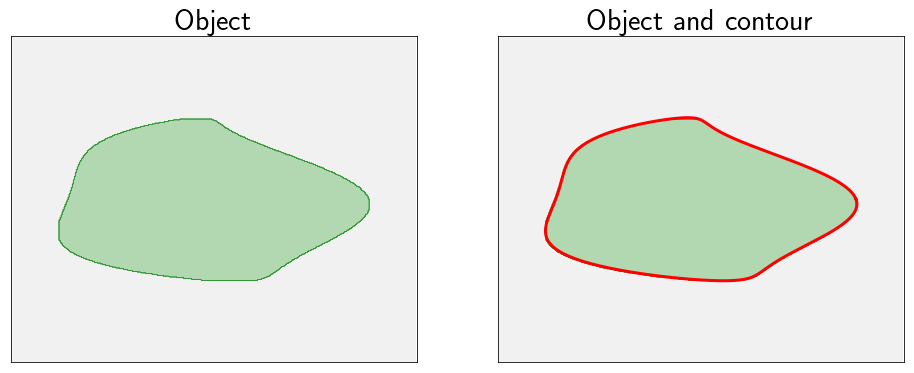

In [9]:
T_simulated = np.linspace(0, M, 10000)

# Interpolate with sincd
X_contour = sincd_itrp(X, T_simulated)
Y_contour = sincd_itrp(Y, T_simulated)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Draw simulated contour
ax[1].plot(X_contour, Y_contour, lw=3, color='red')

# Fill in inside and outside in 2 colors
h = 0.01
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

vecint = np.vectorize(np.int)

# Round contour coord
X_contour_grid =  vecint((X_contour-x_min)/h)
Y_contour_grid = vecint((Y_contour-y_min)/h)

# Get rectangular limits of contour
X_contour_min = X_contour_grid.min()
X_contour_max = X_contour_grid.max()

Y_contour_min = Y_contour_grid.min()
Y_contour_max = Y_contour_grid.max()

# Number of cells in the grid
nx = np.int((x_max - x_min)/h)
ny = np.int((y_max - y_min)/h)

Z = []
for y in range(ny):
    if y <= Y_contour_min or Y_contour_max <= y:
        Z += [0]*nx
    else:
        for x in range(nx):
            if x <= X_contour_min or X_contour_max <= x:
                Z += [0]
            else:
                ylim = Y_contour_grid[np.where(X_contour_grid==x)]
                if y < min(ylim) or max(ylim) < y:
                    Z += [0]
                else:
                    Z += [1]
            
                    
Z = np.array(Z)
Z = Z.reshape(xx.shape)
ax[0].contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['lightgray', 'green']))
ax[1].contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['lightgray', 'green']))

# Remove ticks
for i in range(2):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlim((x_min, x_max))
    ax[i].set_ylim((y_min, y_max))

ax[0].set_title('Object', fontsize=30)
ax[1].set_title('Object and contour', fontsize=30)

fig.savefig("../lab_meeting/presentation_2/object.png")
plt.show(fig)

### Object and different contour

Deformable models depending on parameters $c(k)$

$$ r(t) = \sum_{k \in \mathbb{Z}} c(k) \phi(.-k)$$

### Varying c

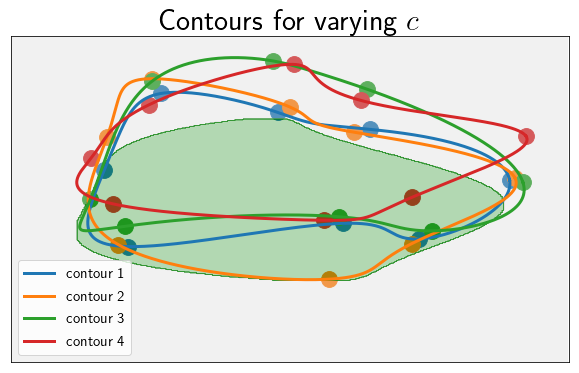

In [10]:
T_simulated = np.linspace(0, M, 1000)
np.random.seed(5)

n_contour = 4
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

for i, color in enumerate(colors[:n_contour]):
    # Coordinates of contours
    Xc = X + 0.2*np.random.rand(X.shape[0])
    Yc = Y + 0.8*np.random.rand(Y.shape[0])

    # Interpolate with sincd
    X_itrp = sincd_itrp(Xc, T_simulated)
    Y_itrp = sincd_itrp(Yc, T_simulated)
    
    # Draw control points
    ax.scatter(Xc, Yc, color=color, marker='o', s=250)

    # Draw interpolated contour
    ax.plot(X_itrp, Y_itrp, lw=3, color=color, label='contour %d' % (i+1))

# Fill in the object
ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['lightgray', 'green']))

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

ax.legend(loc='lower left', fontsize=15)
ax.set_title(r'Contours for varying $c$', fontsize=30)
    
fig.savefig("../lab_meeting/presentation_2/example_var_c_%d.png" % n_contour)
plt.show(fig)

### Varying $\phi$

In [11]:
# Causal b-splines
def bspline(x, r):
    if x < 0 or r <= x:
        return 0
    else:
        if r==1:
            return 1
        else:
            return x/(r-1)*bspline(x, r-1) + (1-(x-1)/(r-1))*bspline(x-1, r-1)

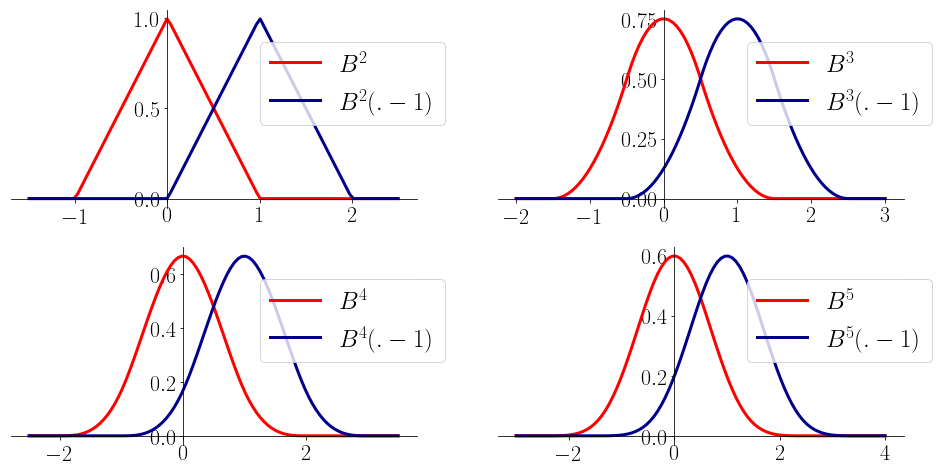

In [12]:
r_max = 5
R = np.arange(2, r_max+1)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
ax = ax.flatten()
for i, r in enumerate(R):
    T_plot = np.linspace(-r/2-0.5, r/2+0.5+1, 100)
    ax[i].plot(T_plot, [bspline(t+r/2, r) for t in T_plot], lw=3, color='red', label=r'$B^{%d}$' %r)
    ax[i].plot(T_plot, [bspline(t+r/2-1, r) for t in T_plot], lw=3, color='darkblue', label=r'$B^{%d}(.-1)$' %r)

    ax[i].spines['left'].set_position('zero')
    ax[i].spines['bottom'].set_position('zero')
    ax[i].spines['right'].set_color('none')
    ax[i].spines['top'].set_color('none')
    ax[i].xaxis.set_ticks_position('bottom')
    ax[i].yaxis.set_ticks_position('left')

    ax[i].tick_params(axis='both', labelsize=22)
    ax[i].legend(loc='upper right', fontsize=25, bbox_to_anchor=(1.1, 0.9))

fig.savefig("../lab_meeting/presentation_2/example_bspline.png")
plt.show(fig)

In [13]:
def bspline_itrp(X, T, r):
    M = len(X)
    if isinstance(T, np.ndarray):    
        return np.array([sum([X[k%M]*bspline(t-k+r/2, r) for k in range(-r, M+r)]) for t in T])
    else:
        return sum([X[k%M]*bspline(T-k+r/2, r) for k in range(-r, M+r)])

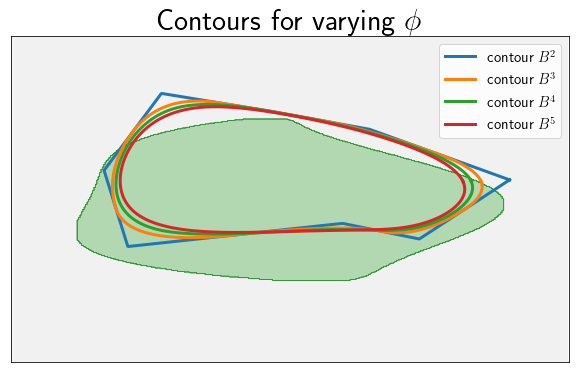

In [14]:
T_simulated = np.linspace(0, M, 1000)
np.random.seed(5)

# Coefficients 
Xc = X + 0.2*np.random.rand(X.shape[0])
Yc = Y + 0.8*np.random.rand(Y.shape[0])

# Maximum order interpolation
r_max = 5
R = np.arange(2, r_max+1)

# Number of contours
n_contour = r_max - 1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

for r, color in zip(R, colors):
    # Interpolate with sincd
    X_itrp = bspline_itrp(Xc, T_simulated, r)
    Y_itrp = bspline_itrp(Yc, T_simulated, r)

    # Draw interpolated contour
    ax.plot(X_itrp, Y_itrp, lw=3, color=color, label='contour $B^{%d}$' % (r))

# Fill in the object
ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['lightgray', 'green']))

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

ax.legend(loc='best', fontsize=15)
ax.set_title(r'Contours for varying $\phi$', fontsize=30)
    
fig.savefig("../lab_meeting/presentation_2/example_var_b_%d.png" % n_contour)
plt.show(fig)

### Case 1: Optimization + user feedback

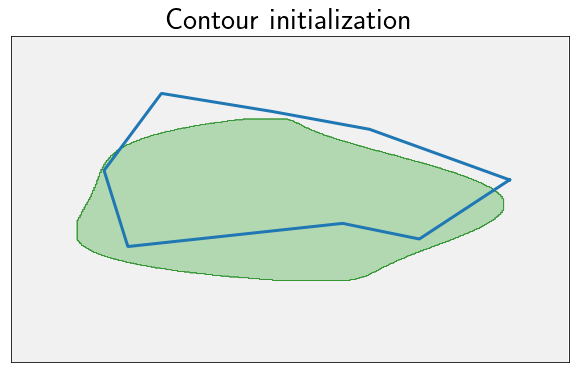

In [15]:
T_simulated = np.linspace(0, M, 1000)
np.random.seed(5)

# Coefficients 
Xc = X + 0.2*np.random.rand(X.shape[0])
Yc = Y + 0.8*np.random.rand(Y.shape[0])

# Maximum order interpolation
r_max = 2
R = np.arange(2, r_max+1)

# Number of contours
n_contour = r_max - 1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

for r, color in zip(R, colors):
    # Interpolate with sincd
    X_itrp = bspline_itrp(Xc, T_simulated, r)
    Y_itrp = bspline_itrp(Yc, T_simulated, r)

    # Draw interpolated contour
    ax.plot(X_itrp, Y_itrp, lw=3, color=color, label='contour $B^{%d}$' % (r))

# Fill in the object
ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['lightgray', 'green']))

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

ax.set_title(r'Contour initialization', fontsize=30)
    
fig.savefig("../lab_meeting/presentation_2/example_init.png")
plt.show(fig)

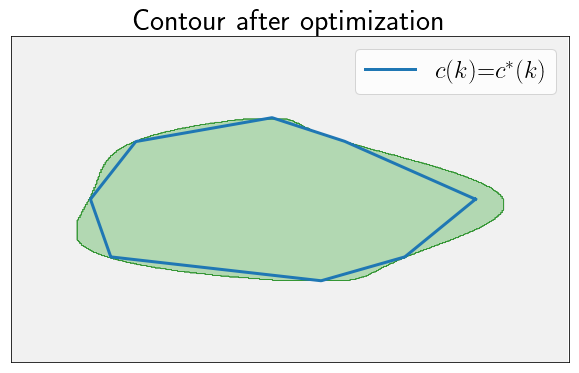

In [16]:
T_simulated = np.linspace(0, M, 1000)
np.random.seed(5)

# Maximum order interpolation
r = 2

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
X_opt = np.copy(X)
X_opt[0] -= 0.2

# Interpolate with sincd
X_itrp = bspline_itrp(X_opt, T_simulated, r)
Y_itrp = bspline_itrp(Y, T_simulated, r)

# Draw interpolated contour
ax.plot(X_itrp, Y_itrp, lw=3, color=color, label='$c(k)$=$c^*(k)$')

# Fill in the object
ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['lightgray', 'green']))

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

ax.legend(loc='best', fontsize=25)
ax.set_title(r'Contour after optimization', fontsize=30)
    
fig.savefig("../lab_meeting/presentation_2/example_opt.png")
plt.show(fig)

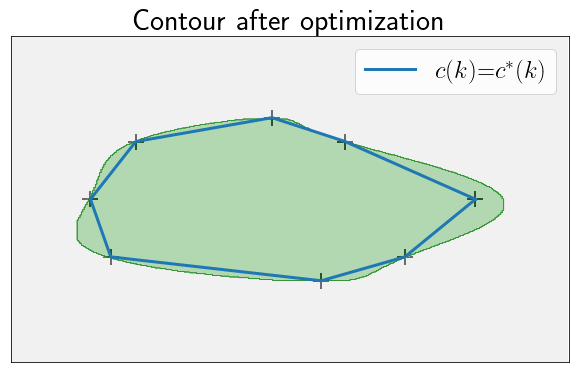

In [17]:
T_simulated = np.linspace(0, M, 1000)
np.random.seed(5)

# Maximum order interpolation
r = 2

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
X_opt = np.copy(X)
X_opt[0] -= 0.2

# Interpolate with sincd
X_itrp = bspline_itrp(X_opt, T_simulated, r)
Y_itrp = bspline_itrp(Y, T_simulated, r)

# Draw interpolated contour
ax.plot(X_itrp, Y_itrp, lw=3, color=color, label='$c(k)$=$c^*(k)$')

# Draw coefficients
ax.scatter(X_opt, Y, s=250, color='black', marker='+')

# Fill in the object
ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['lightgray', 'green']))

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

ax.legend(loc='best', fontsize=25)
ax.set_title(r'Contour after optimization', fontsize=30)
    
fig.savefig("../lab_meeting/presentation_2/example_opt_coef.png")
plt.show(fig)

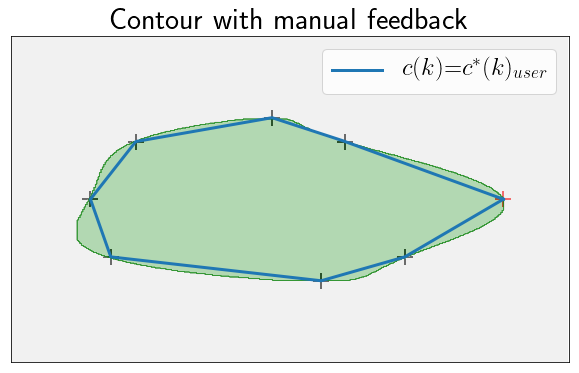

In [18]:
T_simulated = np.linspace(0, M, 1000)
np.random.seed(5)

# Maximum order interpolation
r = 2

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Interpolate with sincd
X_itrp = bspline_itrp(X, T_simulated, r)
Y_itrp = bspline_itrp(Y, T_simulated, r)

# Draw interpolated contour
ax.plot(X_itrp, Y_itrp, lw=3, color=color, label='$c(k)$=$c^*(k)_{user}$')

# Draw coefficients
ax.scatter(X[1:], Y[1:], s=250, color='black', marker='+')
ax.scatter(X[0], Y[0], s=250, color='red', marker='+')

# Fill in the object
ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['lightgray', 'green']))

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

ax.legend(loc='best', fontsize=25)
ax.set_title(r'Contour with manual feedback', fontsize=30)
    
fig.savefig("../lab_meeting/presentation_2/example_opt_user.png")
plt.show(fig)

### Case 2: User only

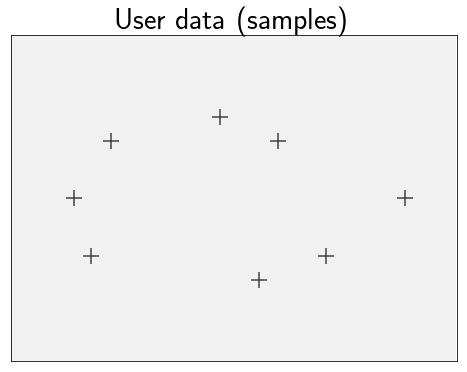

In [19]:
# Draw sample data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.scatter(X, Y, s=250, marker='+', color='black')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))
ax.set_title('User data (samples)', fontsize=30)

# Fill in the object
ax.contourf(xx, yy, np.zeros(xx.shape), alpha=0.3, cmap=ListedColormap(['lightgray', 'green']))

fig.savefig("../lab_meeting/presentation_2/example_user_only.png")

plt.show(fig)

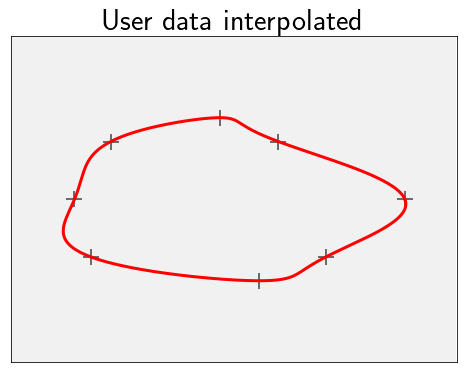

In [20]:
# Interpolate with sincd
X_contour = sincd_itrp(X, T_simulated)
Y_contour = sincd_itrp(Y, T_simulated)

# Draw sample data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.scatter(X, Y, s=250, marker='+', color='black')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))
ax.set_title('User data interpolated', fontsize=30)

# Draw simulated contour
ax.plot(X_contour, Y_contour, lw=3, color='red')

# Fill in the object
ax.contourf(xx, yy, np.zeros(xx.shape), alpha=0.3, cmap=ListedColormap(['lightgray', 'green']))

fig.savefig("../lab_meeting/presentation_2/example_user_only_contour.png")
plt.show(fig)

# I. Polynomial interpolation

In [21]:
class OracleSin(object):
    def __init__(self):
        pass
    def value(self, X):
        return np.sin(X)
    def derivative(self, X, r):
        if r%2 == 0:
            return (-1)**(r//2)*np.sin(X)
        else:
            return (-1)**((r)//2)*np.cos(X)
        
class OracleRunge(object):
    def __init__(self):
        pass
    def value(self, X):
        return 1/(1+25*X**2)
    def derivative(self, X, r):
        raise NotImplementedError

## I.1 Principles

In [22]:
def PINT(TAU, oracle, X):
    """
    Parameters
    ----------
    TAU: array (n,)
        Values of the location parameter t 
    oracle: Class
        Custom class that allows to sample the g function and its derivatives
    X: array(m,)
        Locations at which the interpolated function is to be sampled
    Return 
    ---------
    F: array(m,)
        Values of the reconstructed function
    
    Method
    ------
    There exists a unique polynomial of order n (that is degree <= n-1) that
    agrees with g at t_1, ..., t_n
    In Newton form it is given by
            f(x) = \prod_{i=1}^n (x-t_1)...(x-t_{i-1})[t_1, ..., t_i]g
        
    """
    TAU = np.array(TAU)
    n = TAU.shape[0] 
    
    # Dictionary of divided difference of increasing order
    div_diff = {k: np.zeros(n-k) for k in range(n)}
    div_diff[0] = oracle.value(TAU)

    for k in range(1, n):
        for i in range(n-k):
            if TAU[i] == TAU[i+k]:
                div_diff[k][i] = oracle.derivative(TAU[i], k)
            else:
                div_diff[k][i] = (div_diff[k-1][i+1]-div_diff[k-1][i])/(TAU[i+k]-TAU[i])
    
    # Sample values of deriv reconstructed polynomial interpolation
    if not isinstance(X, np.ndarray):
        F = div_diff[0][0] + sum([np.prod(X-np.array(TAU)[:i])*div_diff[i][0] for i in range(1, n)])
        return F
    else:
        F = np.zeros(X.shape)
        for l, x in enumerate(X):
            F[l] = div_diff[0][0] + sum([np.prod(x-np.array(TAU)[:i])*div_diff[i][0] for i in range(1, n)])
        return F

### Lagrange

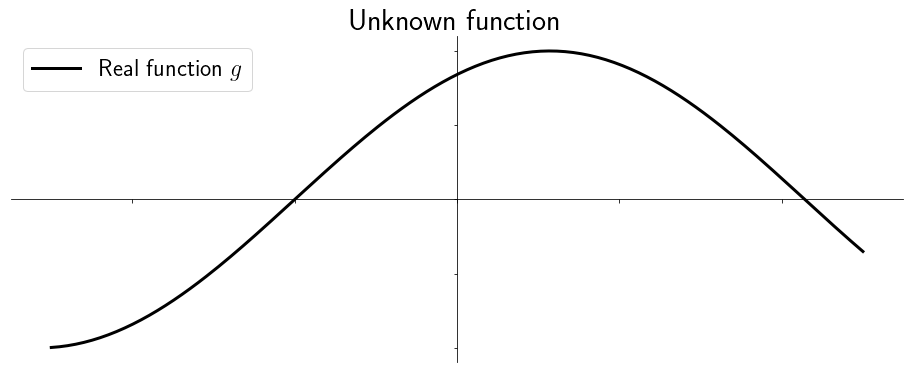

In [23]:
X = np.linspace(-1.5, 3.5, 200)
oracle = OracleSin()
        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

# Draw real function
ax.plot(X, oracle.value(X), lw=3, color='black', label=r"Real function $g$") 

ax.tick_params(axis='both', labelsize=25)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.legend(loc='best', fontsize=24)

ax.set_title("Unknown function", fontsize=30)
fig.savefig("../lab_meeting/presentation_2/lagrange_1.png")
plt.show()

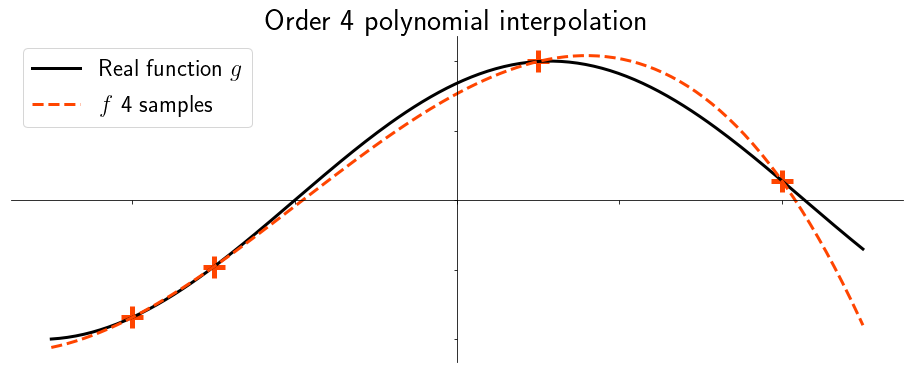

In [24]:
X = np.linspace(-1.5, 3.5, 200)
oracle = OracleSin()
        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

# Draw real function
ax.plot(X, oracle.value(X), lw=3, color='black', label=r"Real function $g$") 

# Draw interpolation 4 points
TAU = np.array([-1, -0.5, 1.5, 3])
ax.scatter(TAU, oracle.value(TAU), marker='+', s=500, lw=5, color='orangered')
ax.plot(X, PINT(TAU, oracle, X), lw=3, color='orangered', ls= "--", label=r"$f$ 4 samples")

ax.tick_params(axis='both', labelsize=25)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.legend(loc='best', fontsize=24)

ax.set_title("Order 4 polynomial interpolation", fontsize=30)
fig.savefig("../lab_meeting/presentation_2/lagrange_2.png")
plt.show()

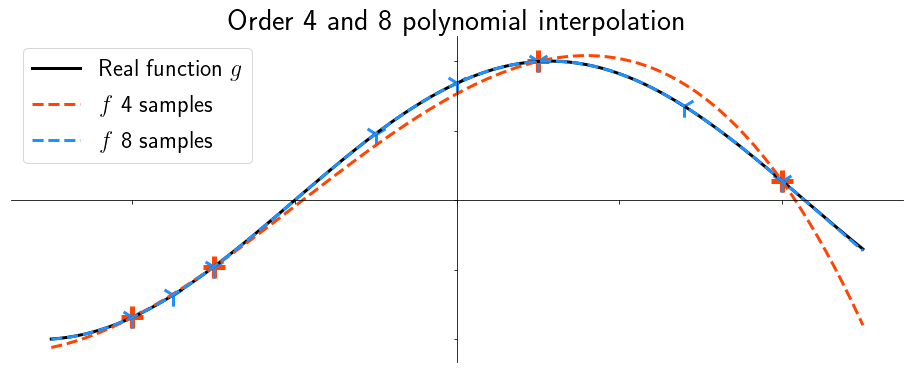

In [25]:
X = np.linspace(-1.5, 3.5, 200)
oracle = OracleSin()
        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

# Draw real function
ax.plot(X, oracle.value(X), lw=3, color='black', label=r"Real function $g$") 

# Draw interpolation 4 points
TAU = np.array([-1, -0.5, 1.5, 3])
ax.scatter(TAU, oracle.value(TAU), marker='+', s=500, lw=5, color='orangered')
ax.plot(X, PINT(TAU, oracle, X), lw=3, color='orangered', ls= "--", label=r"$f$ 4 samples")

# Draw interpolation 4 points
TAU = np.array([-1, -0.75, -0.5, 0.5, 1, 1.5, 2.4, 3])
ax.scatter(TAU, oracle.value(TAU), marker='1', s=500, lw=3, color='dodgerblue')
ax.plot(X, PINT(TAU, oracle, X), lw=3, color='dodgerblue', ls= "--", label=r"$f$ 8 samples")

ax.tick_params(axis='both', labelsize=25)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.legend(loc='best', fontsize=24)

ax.set_title("Order 4 and 8 polynomial interpolation", fontsize=30)
fig.savefig("../lab_meeting/presentation_2/lagrange_3.png")
plt.show()

## I.2 Limits

### Runge example

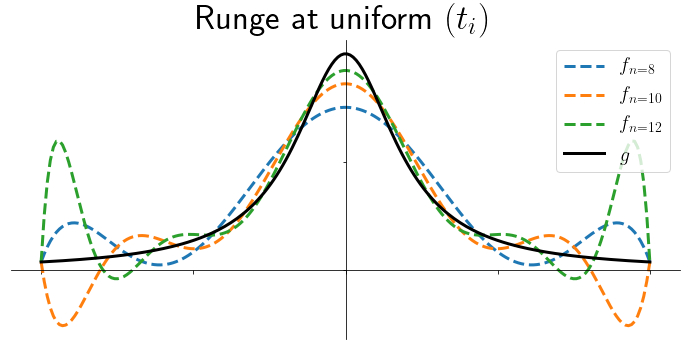

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5.5)) 
oracle = OracleRunge()

for c, n in zip(colors, [8, 10, 12]):
    TAU = np.linspace(-1, 1, n)
    X = np.linspace(TAU[0], TAU[-1], 200)
    ax.plot(X, PINT(TAU, oracle, X), lw=3, color=c, ls= "--", label=r"$f_{n=%d}$" % n) # Reconstructed function f

ax.plot(X, oracle.value(X), lw=3, color='black', label=r"$g$") # Real function
ax.tick_params(axis='both', labelsize=25)
ax.legend(loc='upper right', fontsize=20)

ax.tick_params(axis='both', labelsize=25)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticklabels([])
ax.set_yticklabels([])


ax.set_title(r"Runge at uniform $(t_i)$", fontsize=35)
fig.savefig("../lab_meeting/presentation_2/runge_1.png")
plt.show()

## II. Piecewise-polynomial interpolation

In [27]:
def quick_find(x, xt):
    lxt = len(xt)
    if lxt == 1:
        return 0
    else:
        if x < xt[lxt//2]:
            return quick_find(x, xt[:lxt//2])
        else:
            return lxt//2 + quick_find(x, xt[lxt//2:])

def interv(x, xt):
    """
    from  * a practical guide to splines *  by C. de Boor    

    Computes  left = max( i :  xt(i) .lt. xt(lxt) .and.  xt(i) .le. x )  .

    ******  i n p u t  ******
    x.....the point whose location with respect to the sequence  xt  is
            to be determined.
    xt.....a real sequence, of length  lxt , assumed to be nondecreasing

    ******  o u t p u t  ******
    left, mflag.....both integers, whose value is

    0     -1      if             x < xt[0]
    i      0      if   xt[i]  <= x < xt[i+1]
    i      0      if   xt[i]  <  x = xt[i+1] = xt[lxt-1]
    i      1      if   xt[i]  <      xt[i+1] = xt[lxt-1] < x

    In particular,  mflag = 0  is the 'usual' case.  mflag != 0 indicates that 
    x  lies outside the CLOSED interval xt[0] <= y <= xt[lxt-1] . The asymmetric 
    treatment of the intervals is due to the decision to make all pp functions 
    continuous from the right, but, by returning  mflag = 0  even if x = xt[lxt-1], 
    there is the option of having the computed pp function continuous from the left 
    at  xt[lxt-1].
    """
    lxt = len(xt)
    
    if x < xt[0]:
        return (0, -1)
    elif xt[lxt-1] < x:
        return (lxt-1, 1)
    else:
        return (quick_find(x, xt), 0)
    
def ppvalu(ptbreak, coef, x, jderiv):
    """
    from  * a practical guide to splines *  by c. de boor    
    calls  interv
    calculates value at  x  of  jderiv-th derivative of pp fct from pp-repr

    ******  i n p u t  ******
    break, coef, l, k.....forms the pp-representation of the function  f
        to be evaluated. specifically, the j-th derivative of  f  is
        given by

        coef[j, i] = (d**(j-1))f(ptbreak[i]^+)

    (d**j)f(x) = coef(j+1,i) + h*(coef(j+2,i) + h*( ... (coef(k-1,i) +
                             + h*coef(k,i)/(k-j-1))/(k-j-2) ... )/2)/1

        with  h = x - ptbreak[i],  and
        i=max(0, max(j,  ptbreak[j] <= x , 1 <= j <= l)).

    x.....the point at which to evaluate.
    jderiv.....integer giving the order of the derivative to be evaluat-
        ed.  assumed to be zero or positive.

    ******  o u t p u t  ******
      ppvalu.....the value of the (jderiv)-th derivative of  f  at  x.

    ******  m e t h o d  ******
    the interval index  i , appropriate for  x , is found through a
    call to  interv . the formula above for the  jderiv-th derivative
    of  f  is then evaluated (by nested multiplication).
    """
    ptbreak = np.array(ptbreak)
    coef = np.array(coef)
    k, l = coef.shape[0], coef.shape[1]-1
    
    ppvalu = 0.
    fmmjdr = k - jderiv
    if fmmjdr  <=  0.:
        # derivatives of order  k or higher are identically zero.
        ppvalu = 0.
    else:
        # find index  i  of largest breakpoint to the left of  x .
        i, ndummy = interv(x, ptbreak)
        h = x - ptbreak[i]
        m = k
        while fmmjdr > 0:
            ppvalu = (ppvalu/fmmjdr)*h + coef[m-1, i]
            m = m-1
            fmmjdr = fmmjdr - 1.
    return ppvalu

def hat(t1, t2, t3, x):
    if t1 < x and x <= t2:
        return (x-t1)/(t2-t1)
    elif t2 < x and x < t3:
        return (t3-x)/(t3-t2)
    else:
        return 0

## II.1 Piecewise linear

### 4 segments

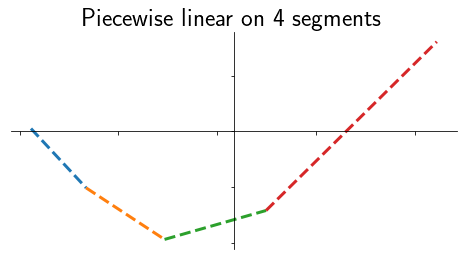

In [28]:
k = 2 # Piecewise order k polynomials
l = 4 # Number of segments

# Unknown function g 
oracle = OracleSin()

np.random.seed(25)
tau = np.array(sorted(2 + np.random.rand(l+1)*6)) # l+1 irregularly spaced locations
pts = oracle.value(tau) # l+1 points from sin function

# coef[j,i] is the jth derivative at t_i^+ of the pp function
coef = np.zeros((k, l)) 
for i in range(l):
    coef[0, i] = pts[i]
    coef[1, i] = (pts[i+1]-pts[i])/(tau[i+1]-tau[i])
        
eps = 1e-6
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# Display pp function on each segment
for i in range(l):
    X = np.linspace(tau[i], tau[i+1]-eps, 100)
    Y = [ppvalu(tau, coef, x, 0) for x in X]
    ax.plot(X, Y, lw=3, ls='--', color=colors[i])

# Display unknown function g
# X = np.linspace(tau[0], tau[-1], 200)    
# ax.plot(X, oracle.value(X), lw=3, color='dodgerblue', label=r"$g$") # Real function
# ax.legend(loc='best', fontsize=25)

ax.tick_params(axis='both', labelsize=25)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_title(r"Piecewise linear on %d segments" % (l), fontsize=25)
fig.savefig("../lab_meeting/presentation_2/pl_1.png")
plt.show()

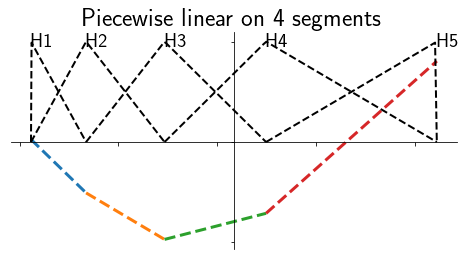

In [29]:
k = 2 # Piecewise order k polynomials
l = 4 # Number of segments

# Unknown function g 
oracle = OracleSin()

np.random.seed(25)
tau = np.array(sorted(2 + np.random.rand(l+1)*6)) # l+1 irregularly spaced locations
pts = oracle.value(tau) # l+1 points from sin function

# coef[j,i] is the jth derivative at t_i^+ of the pp function
coef = np.zeros((k, l)) 
for i in range(l):
    coef[0, i] = pts[i]
    coef[1, i] = (pts[i+1]-pts[i])/(tau[i+1]-tau[i])
        
eps = 1e-6
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# Display pp function on each segment
for i in range(l):
    X = np.linspace(tau[i], tau[i+1]-eps, 100)
    Y = [ppvalu(tau, coef, x, 0) for x in X]
    ax.plot(X, Y, lw=3, ls='--', color=colors[i])
    
# Display hat functions
# l+1=n
for i in range(l+1):
    X = np.linspace(tau[max(i-1, 0)], tau[min(i+1, l)]+eps, 100)
    Y = [hat(tau[max(i-1, 0)], tau[i], tau[min(i+1, l)], x) for x in X]
    ax.plot(X, Y, lw=2, ls='--', color='black')
    ax.annotate("H%d" % (i+1), size=20, xy=(tau[i], 0.95))

ax.tick_params(axis='both', labelsize=25)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_title(r"Piecewise linear on %d segments" % (l), fontsize=25)
fig.savefig("../lab_meeting/presentation_2/pl_1_hat.png")
plt.show()

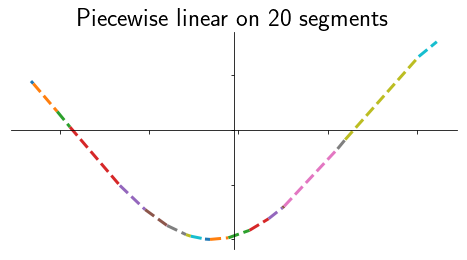

In [30]:
k = 2 # Piecewise order k polynomials
l = 20 # Number of segments

# Unknown function g 
oracle = OracleSin()

np.random.seed(25)
tau = np.array(sorted(2 + np.random.rand(l+1)*6)) # l+1 irregularly spaced locations
pts = oracle.value(tau) # l+1 points from sin function

# coef[j,i] is the jth derivative at t_i^+ of the pp function
coef = np.zeros((k, l)) 
for i in range(l):
    coef[0, i] = pts[i]
    coef[1, i] = (pts[i+1]-pts[i])/(tau[i+1]-tau[i])
        
eps = 1e-6
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# Display pp function on each segment
for i in range(l):
    X = np.linspace(tau[i], tau[i+1]-eps, 100)
    Y = [ppvalu(tau, coef, x, 0) for x in X]
    ax.plot(X, Y, lw=3, ls='--', color=colors[i%len(colors)])

ax.tick_params(axis='both', labelsize=25)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_title(r"Piecewise linear on %d segments" % (l), fontsize=25)
fig.savefig("../lab_meeting/presentation_2/pl_2.png")
plt.show()

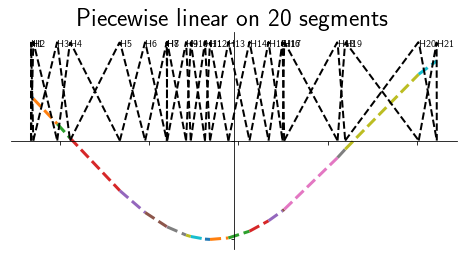

In [31]:
k = 2 # Piecewise order k polynomials
l = 20 # Number of segments

# Unknown function g 
oracle = OracleSin()

np.random.seed(25)
tau = np.array(sorted(2 + np.random.rand(l+1)*6)) # l+1 irregularly spaced locations
pts = oracle.value(tau) # l+1 points from sin function

# coef[j,i] is the jth derivative at t_i^+ of the pp function
coef = np.zeros((k, l)) 
for i in range(l):
    coef[0, i] = pts[i]
    coef[1, i] = (pts[i+1]-pts[i])/(tau[i+1]-tau[i])
        
eps = 1e-6
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# Display pp function on each segment
for i in range(l):
    X = np.linspace(tau[i], tau[i+1]-eps, 100)
    Y = [ppvalu(tau, coef, x, 0) for x in X]
    ax.plot(X, Y, lw=3, ls='--', color=colors[i%len(colors)])
    
# Display hat functions
# l+1=n
for i in range(l+1):
    X = np.linspace(tau[max(i-1, 0)], tau[min(i+1, l)]+eps, 100)
    Y = [hat(tau[max(i-1, 0)], tau[i], tau[min(i+1, l)], x) for x in X]
    ax.plot(X, Y, lw=2, ls='--', color='black')
    ax.annotate("H%d" % (i+1), size=10, xy=(tau[i], 0.95))

ax.tick_params(axis='both', labelsize=25)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_title(r"Piecewise linear on %d segments" % (l), fontsize=25)
fig.savefig("../lab_meeting/presentation_2/pl_2_hat.png")
plt.show()

## II. 2 Piecewise cubic

### Position of the problem - 4 segments

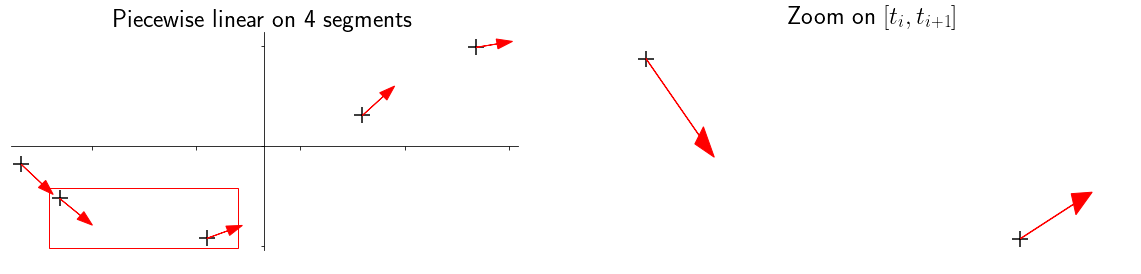

In [32]:
k = 4 # Piecewise order k polynomials
l = 4 # Number of segments

# Unknown function g 
oracle = OracleSin()

np.random.seed(23)
tau = np.array(sorted(2 + np.random.rand(l+1)*6)) # l+1 irregularly spaced locations
pts = oracle.value(tau) # l+1 points from sin function
drs = oracle.derivative(tau, 1) # l+1 points from deriv
        
eps = 1e-6
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))

# Display points and arrows
for t, pt, dr in zip(tau, pts, drs):
    ax[0].scatter(t, pt, color='black', s=250, marker='+')
    ax[0].arrow(t, pt, 0.2, 0.2*dr, head_width=0.1, color='red')
    
ax[0].tick_params(axis='both', labelsize=25)
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_xlim(tau[0]-0.1, tau[-1]+0.4)

# Create a Rectangle patch
rect = patches.Rectangle((tau[1]-0.1,min(pts[1], pts[2])-0.1), tau[2]-tau[1] + 0.4, abs(pts[2]-pts[1])+0.2,linewidth=1,edgecolor='r',facecolor='none')
ax[0].add_patch(rect)
ax[0].set_title(r"Piecewise linear on %d segments" % (l), fontsize=25)

# Display points and arrows
for t, pt, dr in zip(tau[1:3], pts[1:3], drs[1:3]):
    ax[1].scatter(t, pt, color='black', s=250, marker='+')
    ax[1].arrow(t, pt, 0.2, 0.2*dr, head_width=0.05, color='red')
    
ax[1].axis('off')
ax[1].set_xlim(tau[1]-0.1, tau[2]+0.4)
ax[1].set_title(r"Zoom on $[t_i, t_{i+1}]$", fontsize=25)

fig.savefig("../lab_meeting/presentation_2/pc_1.png")
plt.show()


### Examples piecewise cubic 

In [33]:
def SHFTPOWER(coef, tau, x):
    return sum([c*(x-tau)**i for i,c in enumerate(coef)])

def DIVDIF(tau, oracle):
    tau = np.array(tau)
    n = tau.shape[0] 

    # Dictionary of divided difference of increasing order
    div_dif = {k: np.zeros(n-k) for k in range(n)}
    div_dif[0] = oracle.value(tau)

    for k in range(1, n):
        for i in range(n-k):
            if tau[i] == tau[i+k]:
                div_dif[k][i] = oracle.derivative(tau[i], k)
            else:
                div_dif[k][i] = (div_dif[k-1][i+1]-div_dif[k-1][i])/(tau[i+k]-tau[i])
    return div_dif[n-1][0]

### Hermite

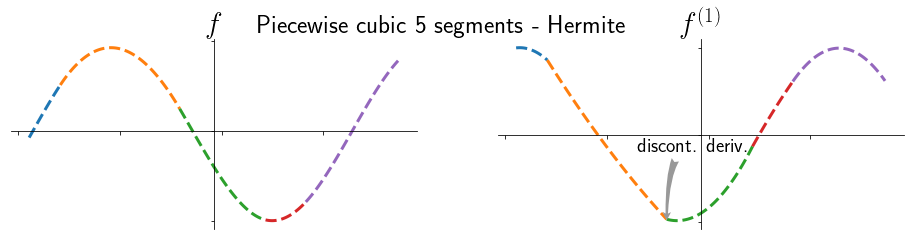

In [34]:
n = 6 # Number of points
np.random.seed(23)
tau = np.array(sorted(4 + np.random.rand(n)*10)) # n irregularly spaced points
oracle = OracleSin()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 3.5))

# Display pp function on each segment
for i in range(n-1):
    X = np.linspace(tau[i], tau[i+1], 100)
    Y = PINT([tau[i], tau[i], tau[i+1], tau[i+1]], oracle, X)
    ax[0].plot(X, Y, lw=3, ls='--', color=colors[i])

ax[0].tick_params(axis='both', labelsize=25)
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_title(r'$f$', fontsize=30)

# Display derivative pp function on each segment
for i in range(n-1):
    X = np.linspace(tau[i], tau[i+1], 100)
    Y = [d_operator(lambda z: PINT([tau[i], tau[i], tau[i+1], tau[i+1]], oracle, z), x, 1) for x in X]
    ax[1].plot(X, Y, lw=3, ls='--', color=colors[i])

ax[1].tick_params(axis='both', labelsize=25)
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')    
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title(r'$f^{(1)}$', fontsize=30)

ax[1].annotate('discont. deriv.',
            xy=(tau[2], -1), xycoords='data',
            xytext=(-30, 70), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=+90"))

plt.suptitle(r"Piecewise cubic %d segments - Hermite" % (n-1), fontsize=25)
fig.savefig("../lab_meeting/presentation_2/cubic_1.png")
plt.show()

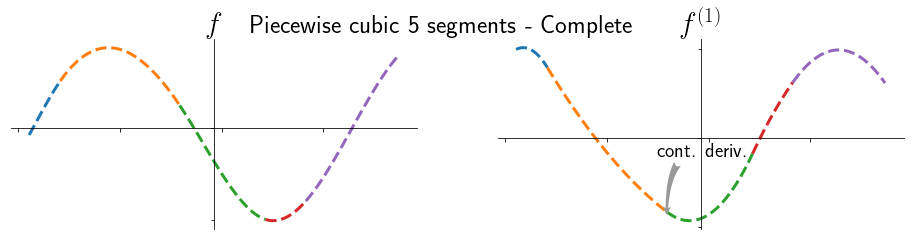

In [35]:
n = 6 # Number of points
np.random.seed(23)
tau = np.array(sorted(4 + np.random.rand(n)*10)) # n irregularly spaced points
oracle = OracleSin()

# Slopes
S = np.zeros(n)
S[0] = oracle.derivative(tau[0], 1)
S[-1] = oracle.derivative(tau[-1], 1)

# Compute slopes that make interpolant C^2 continuous at breaks
A = np.zeros((n-2, n-2))
B = np.zeros(n-2)
for i in range(n-2):
    data_i = tau[i+2]-tau[i+1]
    data_im = tau[i+1]-tau[i]
    if i==0:
        A[i,i] = 2*(data_i+data_im)
        A[i,i+1] = data_im
        B[i] = 3*((data_i*DIVDIF(tau[i:i+2], oracle) + data_im*DIVDIF(tau[i+1:i+3], oracle))) - S[i]*data_i
    elif i==n-3:
        A[i,i-1] = data_i
        A[i,i] = 2*(data_i+data_im)
        B[i] = 3*((data_i*DIVDIF(tau[i:i+2], oracle) + data_im*DIVDIF(tau[i+1:i+3], oracle))) - S[i+2]*data_im
    else:
        A[i,i-1] = data_i
        A[i,i] = 2*(data_i+data_im)
        A[i,i+1] = data_im
        B[i] = 3*((data_i*DIVDIF(tau[i:i+2], oracle) + data_im*DIVDIF(tau[i+1:i+3], oracle)))
        
S[1:-1] = np.linalg.inv(A).dot(B)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 3.5))   

# Display pp function on each segment
for i in range(n-1):
    X = np.linspace(tau[i], tau[i+1], 100)
    data_i = tau[i+1]-tau[i]
    c_1 = oracle.value(tau[i])
    c_2 = S[i]
    c_4 = (S[i]+S[i+1]-2*DIVDIF(tau[i:i+2], oracle))/data_i**2
    c_3 = (DIVDIF(tau[i:i+2], oracle)-S[i])/data_i - c_4*data_i
    coef = [c_1, c_2, c_3, c_4]
    Y = [SHFTPOWER(coef, tau[i], x) for x in X]
    ax[0].plot(X, Y, lw=3, ls='--', color=colors[i])

ax[0].tick_params(axis='both', labelsize=25)
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_title(r'$f$', fontsize=30)

# Display derivative pp function on each segment
for i in range(n-1):
    X = np.linspace(tau[i], tau[i+1], 100)
    data_i = tau[i+1]-tau[i]
    c_1 = oracle.value(tau[i])
    c_2 = S[i]
    c_4 = (S[i]+S[i+1]-2*DIVDIF(tau[i:i+2], oracle))/data_i**2
    c_3 = (DIVDIF(tau[i:i+2], oracle)-S[i])/data_i - c_4*data_i
    coef = [c_1, c_2, c_3, c_4]
    Y = [d_operator(lambda z: SHFTPOWER(coef, tau[i], z), x, 1) for x in X]
    ax[1].plot(X, Y, lw=3, ls='--', color=colors[i])

X = np.linspace(tau[0], tau[-1], 200)    

ax[1].tick_params(axis='both', labelsize=25)
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')    
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

ax[1].annotate('cont. deriv.',
            xy=(tau[2], -0.88), xycoords='data',
            xytext=(-10, 60), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=+90"))
ax[1].set_title(r'$f^{(1)}$', fontsize=30)

plt.suptitle(r"Piecewise cubic %d segments - Complete" % (n-1), fontsize=25)
fig.savefig("../lab_meeting/presentation_2/cubic_2.png")
plt.show()

# III. Splines

## III.1 Definition and properties

In [36]:
def quick_find(x, xt):
    lxt = len(xt)
    if lxt == 1:
        return 0
    else:
        if x < xt[lxt//2]:
            return quick_find(x, xt[:lxt//2])
        else:
            return lxt//2 + quick_find(x, xt[lxt//2:])
        
def BSPLVB_AUX(KNOTS, i, k, x):
    """
    Method
    ================
      The recurrence relation with t
    
                         x - t(j)                t(j+l) - x
         b(j,l)(x)  =  ----------- b(j,l-1)(x) + ---------------b(j+1,l-1)(x)
                      t(j+l-1)-t(j)              t(j+l)-t(j+1)
    
      is used (repeatedly) to generate the (k)-vector  b(i-k+1, k)(x),..., b(i,k)(x)
      and also the fact that
                b(j,1) = 1  if  t(j) <= x < t(j+1)
      and that
                b(j,l)(x) = 0  unless  t(j) <= x <  t(j+l)
      are used. 
    
    Returns
    =================
    BATX: np.array
        Contains b(i-k+1, k)(x), ...,  b(i, k)(x) for t(i) <= x < t(i+1)
    """
    KNOTS = np.array(KNOTS)
    
    assert KNOTS[i] <= x and x < KNOTS[i+1]
    assert i-k+1 >= 0
    assert i+k < KNOTS.shape[0]

    BATX = {l: np.zeros(l+2) for l in range(1, k+1)}
    
    # b(i, 1)(x)
    BATX[1][1] = 1
    
    def w(j, l, y):
        if KNOTS[j+l-1] == KNOTS[j]:
            return 0
        else:
            return (y-KNOTS[j])/(KNOTS[j+l-1]-KNOTS[j])
    
    for l in range(2, k+1):
        # BATX[l][0] = b(i-l, l)(x) = 0 and BATX[l][l+1] = b(i+1, l)(x) = 0
        for r in range(1, l+1):
            # Computes BATX[l][r] = b(i-l+r, l)(x)
            BATX[l][r] = w(i-l+r, l, x)*BATX[l-1][r-1] + (1-w(i-l+r+1, l, x))*BATX[l-1][r]
    return BATX[k][1:-1]

def BSPLVB(KNOTS, j, k, x):
    """
    Functions to compue b(j, k, x) for any x
    """
    i = quick_find(x, KNOTS)
    if i < j or i+1 > j+k:
        return 0
    else:
        return BSPLVB_AUX(KNOTS, i, k, x)[j+k-1-i]

### Generate knots once

In [97]:
k_max = 4
n=12
np.random.seed(24)
KNOTS_ALL = np.array(sorted(-2 + np.random.rand(n+2*k_max+1)*10)) # n irregularly spaced points

### Order 1

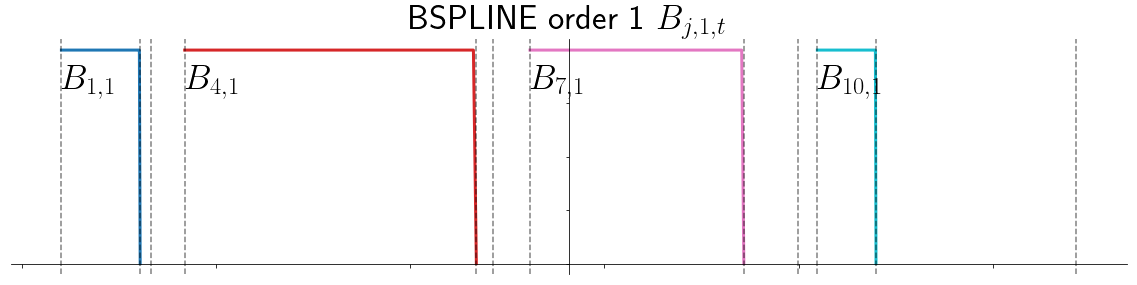

In [38]:
k = 1

KNOTS = KNOTS_ALL[k_max-k: k-k_max]
X = np.linspace(KNOTS[k], KNOTS[n+k-1], 400)

# Display jth B-spline of order k i.e B-spline with support in (KNOTS[j+k], KNOTS[j+2*k])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4.5))
for j in range(0, n-k, 3):
    X = np.linspace(KNOTS[j+k], KNOTS[j+2*k], 100)
    Y = [BSPLVB(KNOTS, j+k, k, x) for x in X]
    ax.plot(X, Y, lw=3, color=colors[j])
    ax.annotate(r"$B_{%d, %d}$" % (j+1, k), size=35, xy=(KNOTS[j+3*k//2], 0.8*BSPLVB(KNOTS, j+k, k, KNOTS[j+3*k//2])))

# Display knots locations
for x in KNOTS[k:n+k]:
    ax.axvline(x, color='black', ls='--', alpha=0.5)

ax.tick_params(axis='both', labelsize=25)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.tick_params(axis='both', labelsize=20)
title = r"BSPLINE order %d $B_{j, %d, t}$" % (k, k)    
ax.set_title(title, fontsize=35)
 
plt.subplots_adjust(top=0.85)
fig.savefig("../lab_meeting/presentation_2/bspline_order_%d.png" % k)
plt.show(fig)

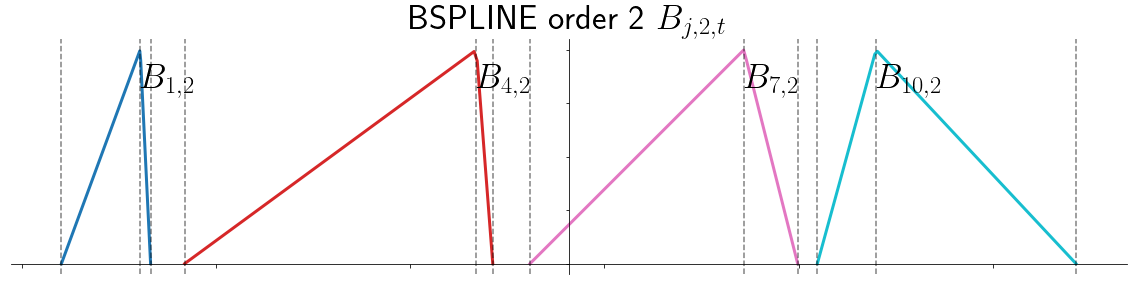

In [39]:
k = 2

KNOTS = KNOTS_ALL[k_max-k: k-k_max]
X = np.linspace(KNOTS[k], KNOTS[n+k-1], 400)

# Display jth B-spline of order k i.e B-spline with support in (KNOTS[j+k], KNOTS[j+2*k])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4.5))
for j in range(0, n-k, 3):
    X = np.linspace(KNOTS[j+k], KNOTS[j+2*k], 100)
    Y = [BSPLVB(KNOTS, j+k, k, x) for x in X]
    ax.plot(X, Y, lw=3, color=colors[j])
    ax.annotate(r"$B_{%d, %d}$" % (j+1, k), size=35, xy=(KNOTS[j+3*k//2], 0.8*BSPLVB(KNOTS, j+k, k, KNOTS[j+3*k//2])))

# Display knots locations
for x in KNOTS[k:n+k]:
    ax.axvline(x, color='black', ls='--', alpha=0.5)

ax.tick_params(axis='both', labelsize=25)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.tick_params(axis='both', labelsize=20)
title = r"BSPLINE order %d $B_{j, %d, t}$" % (k, k)    
ax.set_title(title, fontsize=35)
 
plt.subplots_adjust(top=0.85)
fig.savefig("../lab_meeting/presentation_2/bspline_order_%d.png" % k)
plt.show(fig)

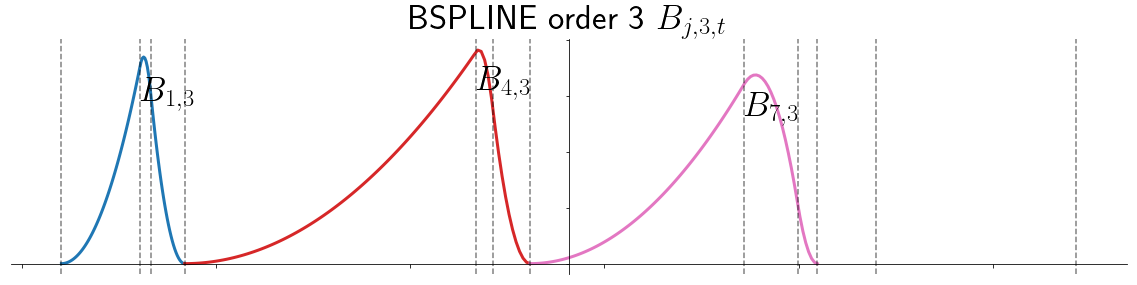

In [40]:
k = 3

KNOTS = KNOTS_ALL[k_max-k: k-k_max]
X = np.linspace(KNOTS[k], KNOTS[n+k-1], 400)

# Display jth B-spline of order k i.e B-spline with support in (KNOTS[j+k], KNOTS[j+2*k])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4.5))
for j in range(0, n-k, 3):
    X = np.linspace(KNOTS[j+k], KNOTS[j+2*k], 100)
    Y = [BSPLVB(KNOTS, j+k, k, x) for x in X]
    ax.plot(X, Y, lw=3, color=colors[j])
    ax.annotate(r"$B_{%d, %d}$" % (j+1, k), size=35, xy=(KNOTS[j+3*k//2], 0.8*BSPLVB(KNOTS, j+k, k, KNOTS[j+3*k//2])))

# Display knots locations
for x in KNOTS[k:n+k]:
    ax.axvline(x, color='black', ls='--', alpha=0.5)

ax.tick_params(axis='both', labelsize=25)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.tick_params(axis='both', labelsize=20)
title = r"BSPLINE order %d $B_{j, %d, t}$" % (k, k)    
ax.set_title(title, fontsize=35)
 
plt.subplots_adjust(top=0.85)
fig.savefig("../lab_meeting/presentation_2/bspline_order_%d.png" % k)
plt.show(fig)

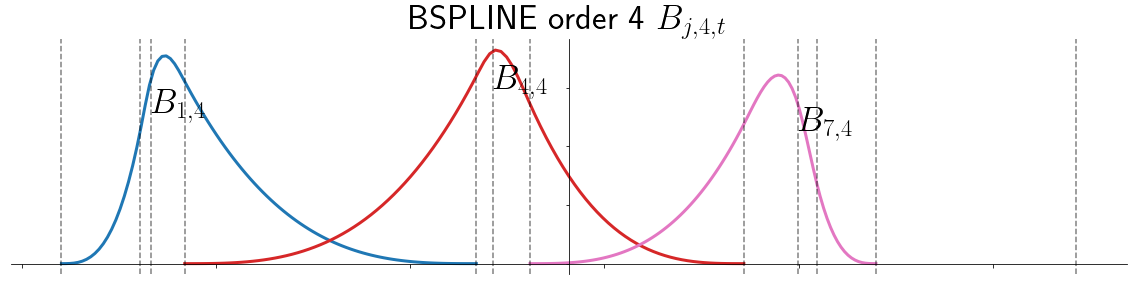

In [41]:
k = 4

X = np.linspace(KNOTS[k], KNOTS[n+k-1], 400)
KNOTS = KNOTS_ALL[:]

# Display jth B-spline of order k i.e B-spline with support in (KNOTS[j+k], KNOTS[j+2*k])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4.5))
for j in range(0, n-k, 3):
    X = np.linspace(KNOTS[j+k], KNOTS[j+2*k], 100)
    Y = [BSPLVB(KNOTS, j+k, k, x) for x in X]
    ax.plot(X, Y, lw=3, color=colors[j])
    ax.annotate(r"$B_{%d, %d}$" % (j+1, k), size=35, xy=(KNOTS[j+3*k//2], 0.8*BSPLVB(KNOTS, j+k, k, KNOTS[j+3*k//2])))

# Display knots locations
for x in KNOTS[k:n+k]:
    ax.axvline(x, color='black', ls='--', alpha=0.5)

ax.tick_params(axis='both', labelsize=25)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.tick_params(axis='both', labelsize=20)
title = r"BSPLINE order %d $B_{j, %d, t}$" % (k, k)    
ax.set_title(title, fontsize=35)
 
plt.subplots_adjust(top=0.85)
fig.savefig("../lab_meeting/presentation_2/bspline_order_%d.png" % k)
plt.show(fig)

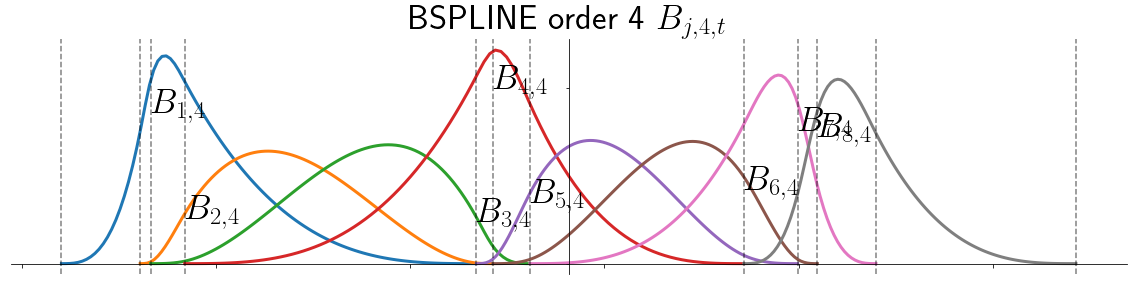

In [98]:
k = 4

X = np.linspace(KNOTS[k], KNOTS[n+k-1], 400)
KNOTS = KNOTS_ALL[:]

# Display jth B-spline of order k i.e B-spline with support in (KNOTS[j+k], KNOTS[j+2*k])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4.5))
for j in range(0, n-k, 1):
    X = np.linspace(KNOTS[j+k], KNOTS[j+2*k], 100)
    Y = [BSPLVB(KNOTS, j+k, k, x) for x in X]
    ax.plot(X, Y, lw=3, color=colors[j])
    ax.annotate(r"$B_{%d, %d}$" % (j+1, k), size=35, xy=(KNOTS[j+3*k//2], 0.8*BSPLVB(KNOTS, j+k, k, KNOTS[j+3*k//2])))

# Display knots locations
for x in KNOTS[k:n+k]:
    ax.axvline(x, color='black', ls='--', alpha=0.5)

ax.tick_params(axis='both', labelsize=25)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.tick_params(axis='both', labelsize=20)
title = r"BSPLINE order %d $B_{j, %d, t}$" % (k, k)    
ax.set_title(title, fontsize=35)
 
plt.subplots_adjust(top=0.85)
plt.show(fig)

### Multiple knots

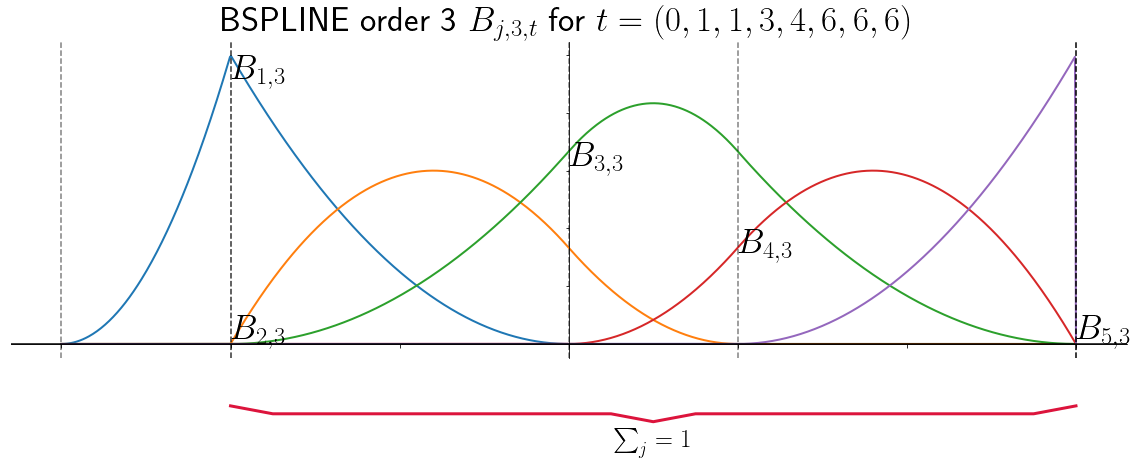

In [42]:
n = 8
k = 3

np.random.seed(23)
KNOTS = [-3, -2, -1, 0, 1, 1, 3, 4, 6, 6, 6, 7, 8, 9, 10]

#KNOTS = np.linspace(-k, n+k, n+2*k+1) # n regularly spaced points
#KNOTS = np.array(sorted(-2 + np.random.rand(n+2*k+1)*10)) # n irregularly spaced points
X = np.linspace(KNOTS[k], KNOTS[n+k-1], 1000)


# Display jth B-spline of order k i.e B-spline with support in (KNOTS[j+k], KNOTS[j+2*k])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))
for j in range(n-k):
    Y = [BSPLVB(KNOTS, j+k, k, x) for x in X]
    ax.plot(X, Y, lw=2, color=colors[j])
    ax.annotate(r"$B_{%d, %d}$" % (j+1, k), size=35, xy=(KNOTS[j+3*k//2], 0.90*BSPLVB(KNOTS, j+k, k, KNOTS[j+3*k//2])))

# Display knots locations
for x in KNOTS[k:n+k]:
    ax.axvline(x, color='black', ls='--', alpha=0.5)
    
# Display x-axis
ax.axhline(0, color='black', ls='-')

# Display bracket 
bracket(ax, text=r"$\sum_j = 1$", pos=[KNOTS[2*k-1], -0.15], scalex=KNOTS[n+k-1]-KNOTS[2*k-1], textkw=dict(size='25'), scaley=2.5, linekw=dict(color="crimson", lw=3) )
        
ax.tick_params(axis='both', labelsize=25)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticklabels([])
ax.set_yticklabels([])

title = r"BSPLINE order %d $B_{j, %d, t}$ for $t=(0,1,1,3,4,6,6,6)$" % (k, k)    
ax.set_title(title, fontsize=35)
    
plt.subplots_adjust(top=0.85)
plt.subplots_adjust(bottom=0.3)
fig.savefig("../lab_meeting/presentation_2/bspline_mult.png")
plt.show(fig)

## Goodman articles

### $n=0, r=1$

In [77]:
n=0
r=1

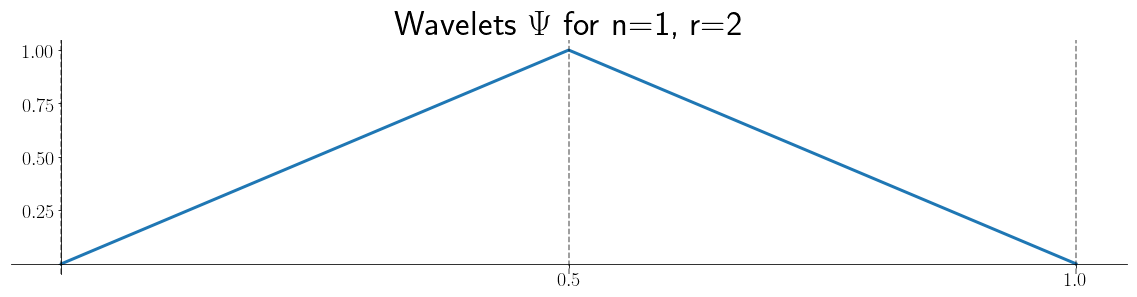

In [90]:
def psi0(t):
    if t < 0 or t > 1:
        return 0
    else:
        if t <= 0.5:
            return 2*t 
        else:
            return 2*(1-t)
        
X = np.linspace(0, 1, 1000)

# Display \Psi_0
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4.5))
ax.plot(X, [psi0(x) for x in X], lw=3, color=colors[0], label=r"$\Psi_0$")

# Display knots locations
for x in [0,0.5,1]:
    ax.axvline(x, color='black', ls='--', alpha=0.5)

ax.tick_params(axis='both', labelsize=25)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticks([0.5,1,])
ax.yaxis.get_major_ticks()[1].label1.set_visible(False)

ax.tick_params(axis='both', labelsize=20)
title = r"Wavelets $\Psi$ for n=%d, r=%d" % (n,r)    
ax.set_title(title, fontsize=35)
 
plt.subplots_adjust(top=0.85)
plt.show(fig)

### $N_0^3(x) = B_{0,4,\mathbb{Z}_2}(2x)$

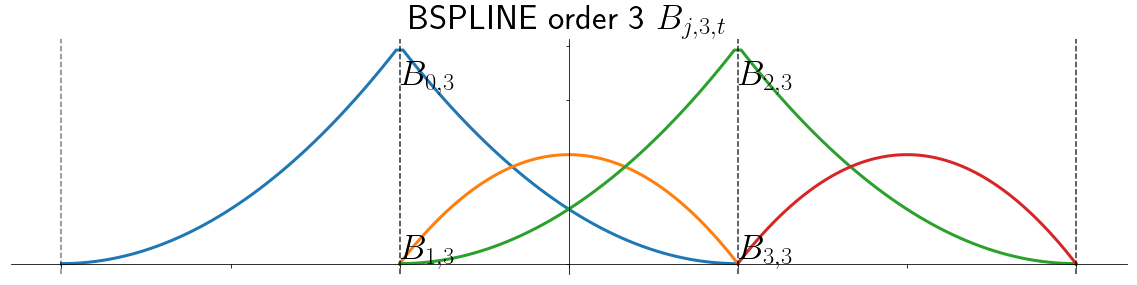

In [59]:
n = 7
k = 3

KNOTS = [-2,-2,-1,-1,0,0,1,1,2,2,3,3,4,4]
X = np.linspace(KNOTS[k], KNOTS[n+k-1], 1000)

# Display jth B-spline of order k i.e B-spline with support in (KNOTS[j+k], KNOTS[j+2*k])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4.5))
for j in range(0, n-k, 1):
    X = np.linspace(KNOTS[j+k], KNOTS[j+2*k], 100)
    Y = [BSPLVB(KNOTS, j+k, k, x) for x in X]
    ax.plot(X, Y, lw=3, color=colors[j])
    ax.annotate(r"$B_{%d, %d}$" % (j, k), size=35, xy=(KNOTS[j+3*k//2], 0.8*BSPLVB(KNOTS, j+k, k, KNOTS[j+3*k//2])))

# Display knots locations
for x in KNOTS[k:n+k]:
    ax.axvline(x, color='black', ls='--', alpha=0.5)

ax.tick_params(axis='both', labelsize=25)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.tick_params(axis='both', labelsize=20)
title = r"BSPLINE order %d $B_{j, %d, t}$" % (k, k)    
ax.set_title(title, fontsize=35)
 
plt.subplots_adjust(top=0.85)
plt.show(fig)

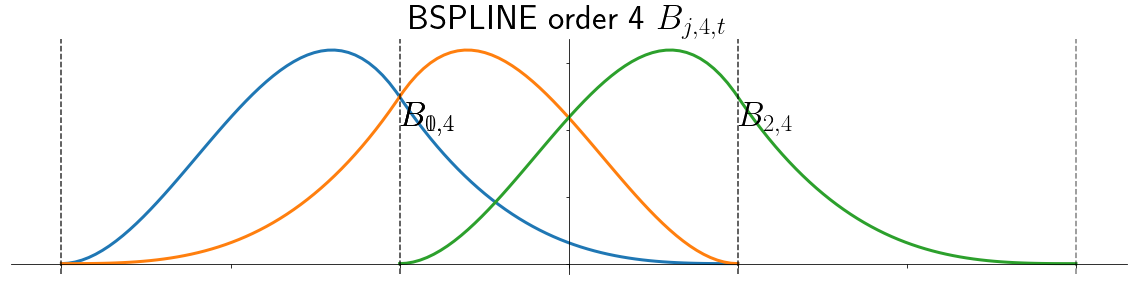

In [60]:
n = 7
k = 4

KNOTS = [-2,-2,-1,-1,0,0,1,1,2,2,3,3,4,4]
X = np.linspace(KNOTS[k], KNOTS[n+k-1], 1000)

# Display jth B-spline of order k i.e B-spline with support in (KNOTS[j+k], KNOTS[j+2*k])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4.5))
for j in range(0, n-k, 1):
    X = np.linspace(KNOTS[j+k], KNOTS[j+2*k], 100)
    Y = [BSPLVB(KNOTS, j+k, k, x) for x in X]
    ax.plot(X, Y, lw=3, color=colors[j])
    ax.annotate(r"$B_{%d, %d}$" % (j, k), size=35, xy=(KNOTS[j+3*k//2], 0.8*BSPLVB(KNOTS, j+k, k, KNOTS[j+3*k//2])))

# Display knots locations
for x in KNOTS[k:n+k]:
    ax.axvline(x, color='black', ls='--', alpha=0.5)

ax.tick_params(axis='both', labelsize=25)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.tick_params(axis='both', labelsize=20)
title = r"BSPLINE order %d $B_{j, %d, t}$" % (k, k)    
ax.set_title(title, fontsize=35)
 
plt.subplots_adjust(top=0.85)
plt.show(fig)

### $\Psi_0, \Psi_1$ for $n=1$, $r=2$

In [88]:
n=1
r=2

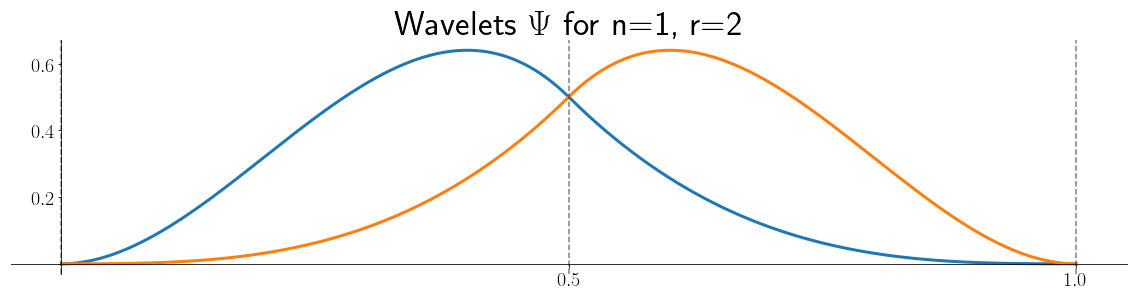

In [93]:
def Psi0(t):
    if t < 0 or t > 1:
        return 0
    else:
        if t < 0.5:
            return 4*(3-5*t)*t**2 
        else:
            return 4*(1-t)**3
        
def Psi1(t):
    if t < 0 or t > 1:
        return 0
    else:
        if t < 0.5:
            return 4*t**3 
        else:
            return 4*(5*t-2)*(1-t)**2
        
X = np.linspace(0, 1, 1000)

# Display \Psi_0, \Psi_1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4.5))
ax.plot(X, [Psi0(x) for x in X], lw=3, color=colors[0], label=r"$\Psi_0$")
ax.plot(X, [Psi1(x) for x in X], lw=3, color=colors[1], label=r"$\Psi_1$")

# Display knots locations
for x in [0,0.5,1]:
    ax.axvline(x, color='black', ls='--', alpha=0.5)

ax.tick_params(axis='both', labelsize=25)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticks([0.5,1,])
ax.yaxis.get_major_ticks()[1].label1.set_visible(False)

ax.tick_params(axis='both', labelsize=20)
title = r"Wavelets $\Psi$ for n=%d, r=%d" % (n,r)    
ax.set_title(title, fontsize=35)
 
plt.subplots_adjust(top=0.85)
plt.show(fig)

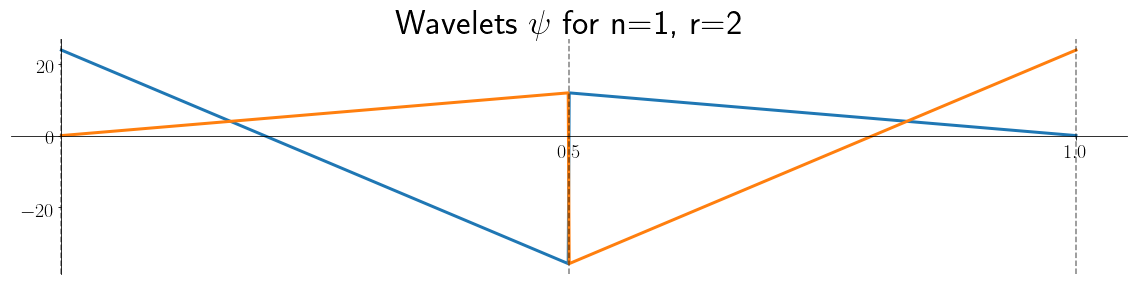

In [95]:
def psi0(t):
    if t < 0 or t > 1:
        return 0
    else:
        if t < 0.5:
            return 24*(1-5*t) 
        else:
            return 24*(1-t)
        
def psi1(t):
    if t < 0 or t > 1:
        return 0
    else:
        if t < 0.5:
            return 24*t
        else:
            return 24*(5*t-4)
        
X = np.linspace(0, 1, 1000)

# Display \Psi_0, \Psi_1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4.5))
ax.plot(X, [psi0(x) for x in X], lw=3, color=colors[0], label=r"$\psi_0$")
ax.plot(X, [psi1(x) for x in X], lw=3, color=colors[1], label=r"$\psi_1$")

# Display knots locations
for x in [0,0.5,1]:
    ax.axvline(x, color='black', ls='--', alpha=0.5)

ax.tick_params(axis='both', labelsize=25)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.set_xticks([0.5,1,])

ax.tick_params(axis='both', labelsize=20)
title = r"Wavelets $\psi$ for n=%d, r=%d" % (n,r)    
ax.set_title(title, fontsize=35)
 
plt.subplots_adjust(top=0.85)
plt.show(fig)